<a href="https://colab.research.google.com/github/Hrithik2212/Neural-Networks-and-Mahine-Learning-Course/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values/

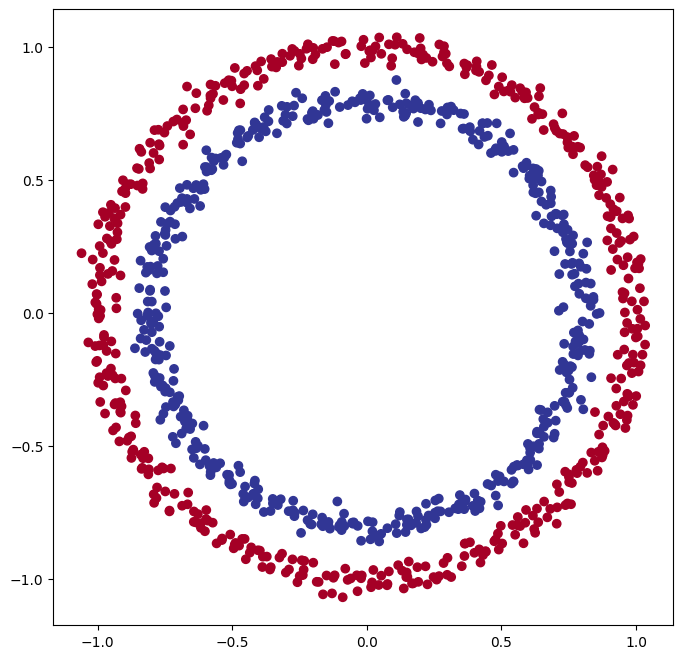

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);


In [25]:

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]
     

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [26]:
from sklearn.model_selection import train_test_split as tts
X_train  , X_test , y_train,y_test = tts(X ,y ,test_size=0.3)
len(X_train) , len(y_train) , len(X_test) ,len(y_test)

(700, 700, 300, 300)

In [27]:
y_train.shape

torch.Size([700])

In [28]:
import torch
import torch.nn as nn


device = 'cuda' if torch.cuda.is_available() else 'cpu'

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()
  
  def forward(self,X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))
mlp = MLP().to(device)

In [29]:

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(mlp.parameters(),
                          lr=1.1)


In [30]:
test_logits.shape

torch.Size([300])

In [31]:
epochs =1001
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  mlp.train()
  # Forward Pass
  y_logits = mlp(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss Function and Accuracy 
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  
  # Optimizer grad Zero
  optimizer.zero_grad()

  # Back Propagation 
  loss.backward()

  # Gradient Descent 
  optimizer.step()

  # Testing 
  mlp.eval()
  with torch.inference_mode():
    # Forward Pass
    test_logits = mlp(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate Loss and Accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if not (epoch %100):
    print(f'Epoch {epoch} | Loss {loss:.5f} | Accuracy {acc} | Test Loss {test_loss:.3f} | Test Accuracy {test_acc}')


Epoch 0 | Loss 0.70153 | Accuracy 50.142857142857146 | Test Loss 0.697 | Test Accuracy 49.666666666666664
Epoch 100 | Loss 0.64289 | Accuracy 69.0 | Test Loss 0.645 | Test Accuracy 59.66666666666667
Epoch 200 | Loss 0.43052 | Accuracy 96.14285714285714 | Test Loss 0.378 | Test Accuracy 99.33333333333333
Epoch 300 | Loss 0.13615 | Accuracy 99.71428571428571 | Test Loss 0.131 | Test Accuracy 99.33333333333333
Epoch 400 | Loss 0.01951 | Accuracy 100.0 | Test Loss 0.018 | Test Accuracy 100.0
Epoch 500 | Loss 0.01006 | Accuracy 100.0 | Test Loss 0.009 | Test Accuracy 100.0
Epoch 600 | Loss 0.00704 | Accuracy 100.0 | Test Loss 0.007 | Test Accuracy 100.0
Epoch 700 | Loss 0.00544 | Accuracy 100.0 | Test Loss 0.005 | Test Accuracy 100.0
Epoch 800 | Loss 0.00442 | Accuracy 100.0 | Test Loss 0.005 | Test Accuracy 100.0
Epoch 900 | Loss 0.00372 | Accuracy 100.0 | Test Loss 0.004 | Test Accuracy 100.0
Epoch 1000 | Loss 0.00321 | Accuracy 100.0 | Test Loss 0.004 | Test Accuracy 100.0


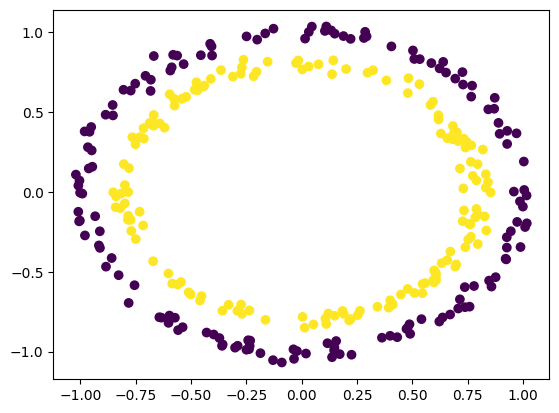

In [35]:
import matplotlib.pyplot as plt 
plt.scatter(X_test[:,0].detach().numpy() , X_test[:,1].detach().numpy() , c = test_pred.detach().numpy() )